In [1]:
import pandas as pd
from sklearn import preprocessing

In [2]:
df_office = pd.read_csv('./data/summary_20230112.csv')
df_office

,case_name,office,aircon,ventilation,exhaust,countTimeMean_onlyFloating
0,office1_0_0,office1,0.0,0.0,off,2991.405667
1,office1_0_123_aout,office1,0.0,123.0,a,2656.982333
2,office1_0_123_bout,office1,0.0,123.0,b,2951.144667
3,office1_0_164_aout,office1,0.0,164.0,a,2470.395667
4,office1_0_164_bout,office1,0.0,164.0,b,3271.053000
...,...,...,...,...,...,...
902,office33_960_164_bout,office33,960.0,164.0,b,2504.354667
903,office33_960_246_aout,office33,960.0,246.0,a,1331.682000
904,office33_960_246_bout,office33,960.0,246.0,b,1495.644000
905,office33_960_82_aout,office33,960.0,82.0,a,2227.621000


In [3]:
df_total = pd.get_dummies(df_office, columns=['exhaust'])
df_total = df_total.set_index('case_name')
df_total

,office,aircon,ventilation,countTimeMean_onlyFloating,exhaust_a,exhaust_b,exhaust_off
case_name,,,,,,,
office1_0_0,office1,0.0,0.0,2991.405667,False,False,True
office1_0_123_aout,office1,0.0,123.0,2656.982333,True,False,False
office1_0_123_bout,office1,0.0,123.0,2951.144667,False,True,False
office1_0_164_aout,office1,0.0,164.0,2470.395667,True,False,False
office1_0_164_bout,office1,0.0,164.0,3271.053000,False,True,False
...,...,...,...,...,...,...,...
office33_960_164_bout,office33,960.0,164.0,2504.354667,False,True,False
office33_960_246_aout,office33,960.0,246.0,1331.682000,True,False,False
office33_960_246_bout,office33,960.0,246.0,1495.644000,False,True,False


In [4]:
# 空調条件データの標準化
stdscaler = preprocessing.StandardScaler()
df_meta = df_total[['aircon', 'ventilation', 'exhaust_a', 'exhaust_b', 'exhaust_off']]
stdscaler.fit(df_meta)
df_meta_array = stdscaler.transform(df_meta)

df_meta_standardized = pd.DataFrame(df_meta_array, index=df_total.index, columns=df_meta.columns)
df_meta_standardized

,aircon,ventilation,exhaust_a,exhaust_b,exhaust_off
case_name,,,,,
office1_0_0,-1.387753,-1.665425,-0.868534,-0.868534,2.478252
office1_0_123_aout,-1.387753,-0.204554,1.151365,-0.868534,-0.403510
office1_0_123_bout,-1.387753,-0.204554,-0.868534,1.151365,-0.403510
office1_0_164_aout,-1.387753,0.282403,1.151365,-0.868534,-0.403510
office1_0_164_bout,-1.387753,0.282403,-0.868534,1.151365,-0.403510
...,...,...,...,...,...
office33_960_164_bout,1.293167,0.282403,-0.868534,1.151365,-0.403510
office33_960_246_aout,1.293167,1.256316,1.151365,-0.868534,-0.403510
office33_960_246_bout,1.293167,1.256316,-0.868534,1.151365,-0.403510


In [5]:
# 機械学習に用いるDataFrame
df_ml = df_meta_standardized.join(df_total[['office', 'countTimeMean_onlyFloating']])
df_ml

,aircon,ventilation,exhaust_a,exhaust_b,exhaust_off,office,countTimeMean_onlyFloating
case_name,,,,,,,
office1_0_0,-1.387753,-1.665425,-0.868534,-0.868534,2.478252,office1,2991.405667
office1_0_123_aout,-1.387753,-0.204554,1.151365,-0.868534,-0.403510,office1,2656.982333
office1_0_123_bout,-1.387753,-0.204554,-0.868534,1.151365,-0.403510,office1,2951.144667
office1_0_164_aout,-1.387753,0.282403,1.151365,-0.868534,-0.403510,office1,2470.395667
office1_0_164_bout,-1.387753,0.282403,-0.868534,1.151365,-0.403510,office1,3271.053000
...,...,...,...,...,...,...,...
office33_960_164_bout,1.293167,0.282403,-0.868534,1.151365,-0.403510,office33,2504.354667
office33_960_246_aout,1.293167,1.256316,1.151365,-0.868534,-0.403510,office33,1331.682000
office33_960_246_bout,1.293167,1.256316,-0.868534,1.151365,-0.403510,office33,1495.644000


点群データ準備

In [6]:
import matplotlib.pyplot as plt
import numpy as np

In [7]:
# 三次元点群を描画する関数
def plot3d_points(point_cloud):
    fig = plt.figure(figsize=(5, 5))
    ax = fig.add_subplot(projection='3d')
    ax.scatter(point_cloud[:, 0], point_cloud[:, 1], point_cloud[:, 2], alpha=1.0, s=1)
    ax.set_aspect('equal')
    plt.show()

In [8]:
point_cloud_dict = np.load('./data/point_cloud_dict.npy', allow_pickle=True).item()
point_cloud_dict

{'office1': array([[2.5     , 2.25    , 2.6     ],
        [2.5     , 2.375   , 2.6     ],
        [2.5     , 2.45    , 2.6     ],
        ...,
        [3.825   , 1.733333, 0.7     ],
        [0.925   , 2.875   , 0.05    ],
        [1.495   , 1.278333, 0.53    ]], dtype=float32),
 'office10': array([[3.      , 2.5     , 2.6     ],
        [3.      , 2.625   , 2.6     ],
        [3.      , 2.7     , 2.6     ],
        ...,
        [3.9725  , 2.275   , 0.7     ],
        [3.065   , 4.078333, 0.48    ],
        [1.485   , 2.533333, 0.7     ]], dtype=float32),
 'office11': array([[3.       , 2.5      , 2.6      ],
        [3.       , 2.625    , 2.6      ],
        [3.       , 2.7      , 2.6      ],
        ...,
        [3.96     , 4.305    , 0.53     ],
        [3.45     , 3.183333 , 0.75     ],
        [2.7      , 5.1      , 0.2833333]], dtype=float32),
 'office12': array([[3.      , 2.5     , 2.6     ],
        [3.      , 2.625   , 2.6     ],
        [3.      , 2.7     , 2.6     ],
     

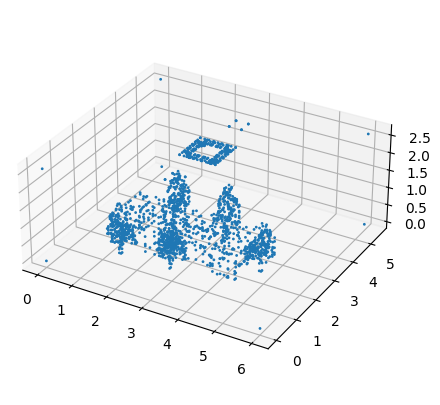

In [9]:
plot3d_points(point_cloud_dict['office1'])

In [10]:
point_cloud_list = []
for i in range(33):
    if i==29:
        continue
    point_cloud_list.append(point_cloud_dict[f'office{i+1}'])

point_cloud_array = np.array(point_cloud_list)

point_cloud_array.shape

(32, 2048, 3)

In [11]:
point_cloud_array_reshape = point_cloud_array.reshape(-1,3)
point_cloud_array_reshape.shape

(65536, 3)

In [12]:
x_mean = []
x_std = []

for i in range(3):
    x_mean.append(np.mean(point_cloud_array_reshape[:,i]))
    x_std.append(np.std(point_cloud_array_reshape[:,i], ddof=0))

print(x_mean)
print(x_std)

[4.060322, 2.6875114, 1.2308416]
[1.9615167, 1.2216018, 0.92776775]


In [13]:
# 3次元点群の標準化定義
def standardization(array:np.array, x_mean, x_std):
    array_std = array.copy()
    for i in range(3):
        array_std[:,i] = (array[:,i] - x_mean[i]) / x_std[i]
    return array_std

officeの分け方

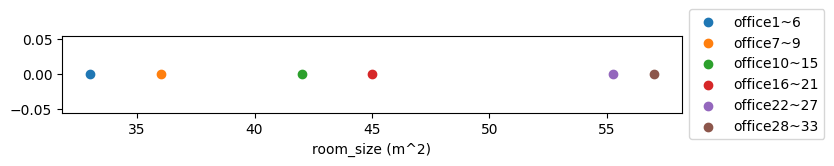

In [14]:
fig = plt.figure(figsize=(8,1))
ax = fig.add_subplot(xlabel='room_size (m^2)')
ax.scatter(33, 0, label='office1~6')
ax.scatter(36, 0, label='office7~9')
ax.scatter(42, 0, label='office10~15')
ax.scatter(45, 0, label='office16~21')
ax.scatter(55.25, 0, label='office22~27')
ax.scatter(57, 0, label='office28~33')
plt.legend(bbox_to_anchor=(1, 0.5), loc='center left')
plt.show()

In [15]:
# 部屋形状6パターン
office_split_list_tmp = [[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 30, 31, 32, 33],
                         [1, 2, 3, 4, 5, 6],
                         [7, 8, 9],
                         [10, 11, 12, 13, 14, 15],
                         [16, 17, 18, 19, 20, 21],
                         [22, 23, 24, 25, 26, 27],
                         [28, 30, 31, 32, 33]]
office_split_list_1 = []
for i in range(len(office_split_list_tmp)):
    office_split_list_1.append(['office' + str(num) for num in office_split_list_tmp[i]])

# 部屋サイズ（大中小）
office_split_list_tmp = [[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 30, 31, 32, 33],
                         [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         [10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21],
                         [22, 23, 24, 25, 26, 27, 28, 30, 31, 32, 33]]
office_split_list_2 = []
for i in range(len(office_split_list_tmp)):
    office_split_list_2.append(['office' + str(num) for num in office_split_list_tmp[i]])

In [16]:
office_split_list_1

[['office1',
  'office2',
  'office3',
  'office4',
  'office5',
  'office6',
  'office7',
  'office8',
  'office9',
  'office10',
  'office11',
  'office12',
  'office13',
  'office14',
  'office15',
  'office16',
  'office17',
  'office18',
  'office19',
  'office20',
  'office21',
  'office22',
  'office23',
  'office24',
  'office25',
  'office26',
  'office27',
  'office28',
  'office30',
  'office31',
  'office32',
  'office33'],
 ['office1', 'office2', 'office3', 'office4', 'office5', 'office6'],
 ['office7', 'office8', 'office9'],
 ['office10', 'office11', 'office12', 'office13', 'office14', 'office15'],
 ['office16', 'office17', 'office18', 'office19', 'office20', 'office21'],
 ['office22', 'office23', 'office24', 'office25', 'office26', 'office27'],
 ['office28', 'office30', 'office31', 'office32', 'office33']]

train test split

In [17]:
def train_test_split(office_split_list):

    list = []

    for split_pattern in office_split_list:

        df_ml_tmp = df_ml[df_ml['office'].isin(split_pattern)].copy()
        df_for_choice = df_ml_tmp.copy()

        test_case_num = len(split_pattern) * 3
        if 'office1' in split_pattern:
            test_case_num += 1

        k = int(df_ml_tmp.shape[0] / test_case_num)

        k_list = []
        
        for i in range(k-1):
            
            all_fit_test_list = []
            df_test = pd.DataFrame()
            
            for office in split_pattern:

                sample_num = 3
                if office=='office1':
                    sample_num = 4
                
                df_choice = df_for_choice[df_for_choice['office']==office].sample(n=sample_num, random_state=0)
                df_test = pd.concat([df_test, df_choice])
            
            df_fit = df_ml_tmp.drop(df_test.index)
            df_for_choice = df_for_choice.drop(df_test.index)

            all_fit_test_list.append(df_ml_tmp)
            all_fit_test_list.append(df_fit)
            all_fit_test_list.append(df_test)

            k_list.append(all_fit_test_list)

        all_fit_test_list = []
        df_fit = df_ml_tmp.drop(df_for_choice.index)
        all_fit_test_list.append(df_ml_tmp)
        all_fit_test_list.append(df_fit)
        all_fit_test_list.append(df_for_choice)
    
        k_list.append(all_fit_test_list)

        list.append(k_list)

    return list

In [18]:
split_df_list_1 = train_test_split(office_split_list_1)
split_df_list_2 = train_test_split(office_split_list_2)

In [19]:
split_df_list_1[1][7][2]

,aircon,ventilation,exhaust_a,exhaust_b,exhaust_off,office,countTimeMean_onlyFloating
case_name,,,,,,,
office1_0_41_aout,-1.387753,-1.178468,1.151365,-0.868534,-0.40351,office1,2694.742667
office1_960_164_bout,1.293167,0.282403,-0.868534,1.151365,-0.40351,office1,1139.555333
office1_0_246_aout,-1.387753,1.256316,1.151365,-0.868534,-0.40351,office1,2945.272000
office1_960_246_bout,1.293167,1.256316,-0.868534,1.151365,-0.40351,office1,1748.890667
office2_960_82_bout,1.293167,-0.691511,-0.868534,1.151365,-0.40351,office2,1447.084000
office2_360_164_aout,-0.382408,0.282403,1.151365,-0.868534,-0.40351,office2,1476.403667
office2_0_82_aout,-1.387753,-0.691511,1.151365,-0.868534,-0.40351,office2,3965.822667
office3_960_82_bout,1.293167,-0.691511,-0.868534,1.151365,-0.40351,office3,2286.312667
office3_360_164_aout,-0.382408,0.282403,1.151365,-0.868534,-0.40351,office3,1582.354333


In [20]:
def prepare_X_y(split_df_list, point_cloud_dict):
    
    X_dict_lists = []
    y_lists = []

    for split_pattern in split_df_list:

        X_k_list = []
        y_k_list = []

        for k_pattern in split_pattern:

            X_all_fit_test_list = []
            y_all_fit_test_list = []

            for df in k_pattern:
                
                pc_list = []

                for office in df['office']:

                    pc_list.append(standardization(point_cloud_dict[office], x_mean, x_std))

                dict_tmp = {'meta' : df[['aircon', 'ventilation', 'exhaust_a', 'exhaust_b', 'exhaust_off']],
                            'pointCloud' : np.array(pc_list)}

                X_all_fit_test_list.append(dict_tmp)
                y_all_fit_test_list.append(df['countTimeMean_onlyFloating'])

            X_k_list.append(X_all_fit_test_list)
            y_k_list.append(y_all_fit_test_list)
        
        X_dict_lists.append(X_k_list)
        y_lists.append(y_k_list)

    return X_dict_lists, y_lists

In [21]:
X_dict_lists_1, y_lists_1 = prepare_X_y(split_df_list_1, point_cloud_dict)
X_dict_lists_2, y_lists_2 = prepare_X_y(split_df_list_2, point_cloud_dict)

学習準備

In [22]:
import keras
from keras.callbacks import EarlyStopping

In [23]:
def model_fit(X_dict_fit, X_dict_test, y_fit, y_test):

    model_str = open('./data/optuna_best_model.json').read()
    model = keras.models.model_from_json(model_str)

    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=0.006781976583074642), # optunaの探索結果
        loss='mse',
        metrics=['mae'],
        )
    
    history = model.fit(
        X_dict_fit, y_fit,
        validation_data = (X_dict_test, y_test),
        epochs = 1000,
        batch_size=64,  # optunaの探索結果
        callbacks=[EarlyStopping(monitor='val_loss', min_delta=0.0, patience=100, restore_best_weights=True,)])
    
    df_hist = pd.DataFrame(history.history)

    return model, df_hist

In [24]:
def k_learning(X_dict_lists, y_lists):

    model_list = []
    df_hist_list = []

    for X_dict_list, y_list in zip(X_dict_lists, y_lists):

        model_list_tmp = []
        df_hist_list_tmp = []

        for X_dict, y in zip(X_dict_list, y_list):

            model, df_hist = model_fit(X_dict[1], X_dict[2], y[1], y[2])

            model_list_tmp.append(model)
            df_hist_list_tmp.append(df_hist)
        
        model_list.append(model_list_tmp)
        df_hist_list.append(df_hist_list_tmp)

    return model_list, df_hist_list

In [25]:
def save_model(model_list, df_hist_list, num):
    for s, split_pattern in enumerate(model_list):
        for k, model in enumerate(split_pattern):
            model.save_weights(f'./output/s{num}p{s+1}k{k+1}.hdf5')
    
    np.save(f'./output/df_hist_list_{num}', df_hist_list)

In [26]:
def load_model(split_df_list, num):

    model_list = []

    for p, split_pattern in enumerate(split_df_list):

        model_list_tmp = []

        for k in range(len(split_pattern)):

            model_str = open('./data/optuna_best_model.json').read()
            model = keras.models.model_from_json(model_str)
            model.load_weights(f'./output/s{num}p{p+1}k{k+1}.hdf5')

            model_list_tmp.append(model)
        
        model_list.append(model_list_tmp)
        
        df_hist_list = np.load(f'./output/df_hist_list_{num}.npy', allow_pickle=True)

    return model_list, df_hist_list

学習

In [27]:
load_weights = True

if load_weights:
    model_list_1, df_hist_list_1 = load_model(split_df_list_1, 1)

else:
    model_list_1, df_hist_list_1 = k_learning(X_dict_lists_1, y_lists_1)

In [ ]:
load_weights = False

if load_weights:
    model_list_2, df_hist_list_2 = load_model(split_df_list_2, 2)

else:
    model_list_2, df_hist_list_2 = k_learning(X_dict_lists_2, y_lists_2)

In [ ]:
# モデル重み・学習履歴保存
# save_model(model_list_1, df_hist_list_1, 1)
# save_model(model_list_2, df_hist_list_2, 2)

予測精度

In [28]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import pickle
import seaborn as sns

In [29]:
def calculate_mae_rmse(X_dict_lists, y_lists, model_list):

    mae_list = []
    rmse_list = []
    size_1 = len(model_list)

    for p_m, models in enumerate(model_list):
               
        size_0 = len(models)
        array_mae = np.zeros((size_0, size_1))
        array_rmse = np.zeros((size_0, size_1))

        for k, model in enumerate(models):

            for p_d, (X_dict_list, y_list) in enumerate(zip(X_dict_lists, y_lists)):

                num = 0
                if p_m==0 or p_d==0 or p_d==p_m:
                    num = 2

                X_dict = X_dict_list[k][num]
                y = y_list[k][num]

                y_pred = model.predict(X_dict)

                array_mae[k, p_d] = mean_absolute_error(y, y_pred)
                array_rmse[k, p_d] = np.sqrt(mean_squared_error(y, y_pred))

        col = ['all'] + [n+1 for n in range(size_1-1)]
        idx = [n+1 for n in range(size_0)]

        df_mae = pd.DataFrame(array_mae, index=idx, columns=col)
        df_rmse = pd.DataFrame(array_rmse, index=idx, columns=col)

        mae_list.append(df_mae)
        rmse_list.append(df_rmse)

    return mae_list, rmse_list

In [30]:
load_file = True

if load_file:
    with open('./output/mae_list_1.pkl', 'rb') as f:
        mae_list_1 = pickle.load(f)
    with open('./output/rmse_list_1.pkl', 'rb') as f:
        rmse_list_1 = pickle.load(f)

else:
    mae_list_1, rmse_list_1 = calculate_mae_rmse(X_dict_lists_1, y_lists_1, model_list_1)

In [ ]:
# mae，rmseの計算結果を保存
# with open('./output/mae_list_1.pkl', 'wb') as f:
#     pickle.dump(mae_list_1, f)
# with open('./output/rmse_list_1.pkl', 'wb') as f:
#     pickle.dump(rmse_list_1, f)

In [31]:
def plot_heatmaps(df_list):

    vmin = np.min(df_list)
    vmax = np.max(df_list)
    size = len(df_list)

    fig, axes = plt.subplots(size, 1, figsize=(6, size*2.5))

    hm_list = []

    for i, df in enumerate(df_list):

        hm_list.append(sns.heatmap(df, annot=True, fmt='.0f', cmap='viridis', vmin=vmin, vmax=vmax, ax=axes[i]))

    plt.show()

In [32]:
def plot_average_heatmap(df_list):

    size = df_list[0].shape[1]
    col = df_list[0].columns
    array = np.zeros((size, size))

    for i, df in enumerate(df_list):

        for j in range(size):

            array[i, j] = np.mean(df.iloc[:, j])
    
    df_mean = pd.DataFrame(array, index=col, columns=col)

    sns.heatmap(df_mean, annot=True, fmt='.0f', cmap='viridis')
    plt.show()

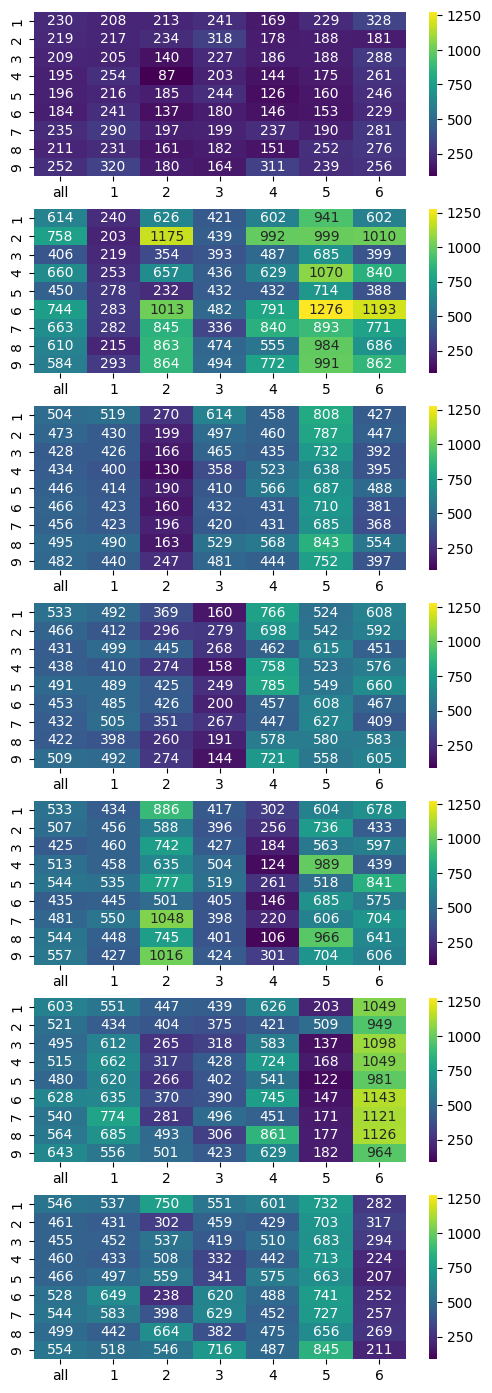

In [33]:
plot_heatmaps(mae_list_1)

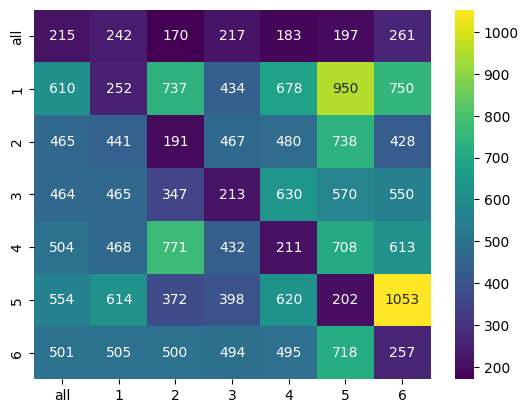

In [34]:
plot_average_heatmap(mae_list_1)

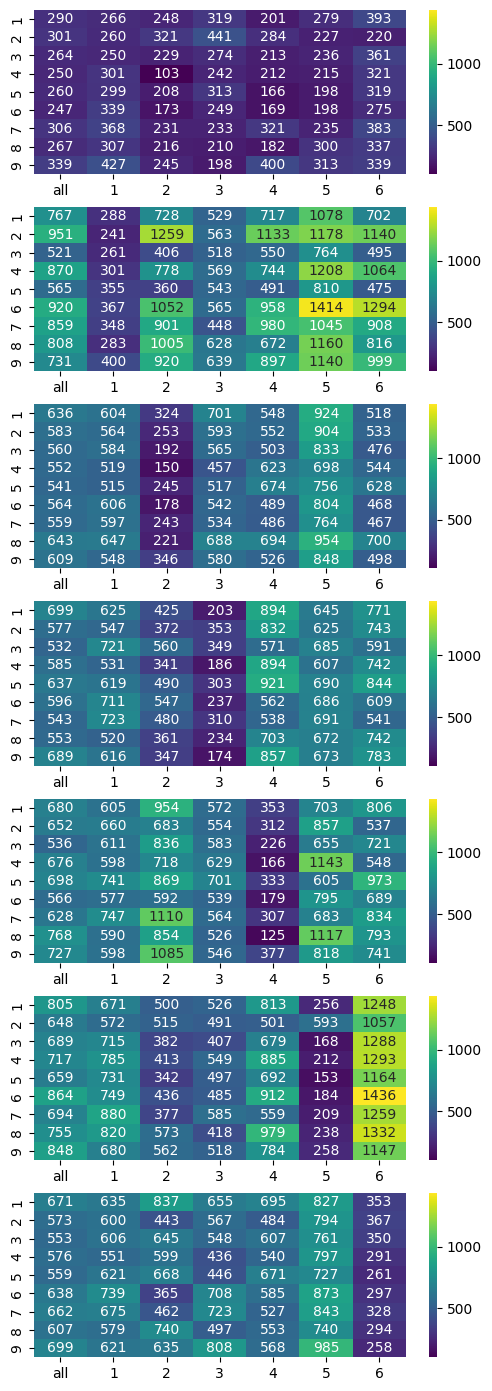

In [35]:
plot_heatmaps(rmse_list_1)

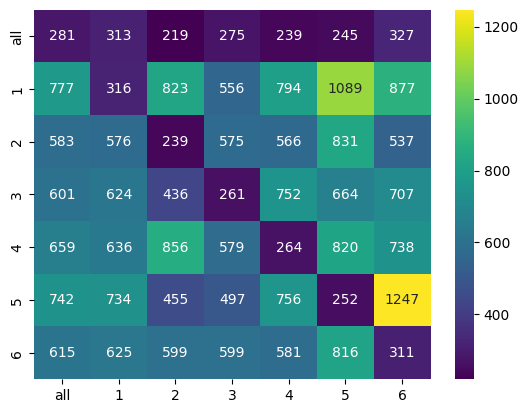

In [36]:
plot_average_heatmap(rmse_list_1)

In [37]:
# 学習曲線をプロットする関数

def plot_learning_curve(df_hist):
    fig = plt.figure(figsize=(6,4))

    ax = fig.add_subplot(
        xlabel='epochs',
        ylabel='loss'
    )
    x = np.array(range(len(df_hist)))
    y = df_hist['loss']
    ax.plot(x, y, label='loss')

    y = df_hist['val_loss']
    ax.plot(x, y, label='val_loss')

    ax.legend(bbox_to_anchor=(1,1), loc='upper right')
    plt.show()

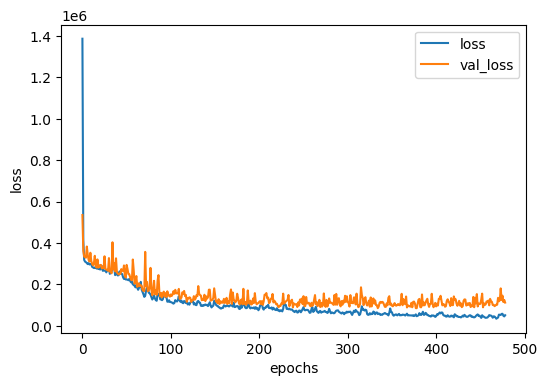

In [38]:
plot_learning_curve(df_hist_list_1[0][0])